# Hypothesis Testing

## Getting Started
### Libraries to Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

### Read in Data

This is a fairly common dataset, here sourced from [data.world](https://data.world/data-society/capital-bikeshare-2011-2012), but also available from the UCI database.

In [2]:
df = pd.read_csv('Data/bike_data.csv')

## Data Cleaning

Our date column was an object, so transform to a datetime with pandas and create a new column for Month.

In [3]:
df.Date = pd.to_datetime(arg=df.Date) #dtype('<M8[ns]')
df['Month'] = df['Date'].dt.month

In [4]:
df.sample(5)

,Date,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users,Month
6783,2011-10-15,3,5,0,6,0,1,52.1,53.6,71,11,1,6,7,10
7650,2011-11-20,3,9,0,0,0,1,53.9,55.4,72,11,29,109,138,11
17288,2012-12-28,4,5,0,5,1,2,36.6,33.8,60,6,0,15,15,12
5948,2011-09-10,3,9,0,6,0,1,71.1,73.4,78,20,39,168,207,9
1550,2011-03-09,1,23,0,3,1,3,45.2,42.8,93,13,1,17,18,3


## Hypothesis Testing

### Do users ride more during comfortable temperatures?

Thanks to Matt Wilkins for his bike riding expertise. 

In [5]:
df['Comfortable Temp?'] = np.where((df['Temperature Feels F'] > 50) & (df['Temperature Feels F'] < 85), 1, 0)

#### Let's Start with some Visualization

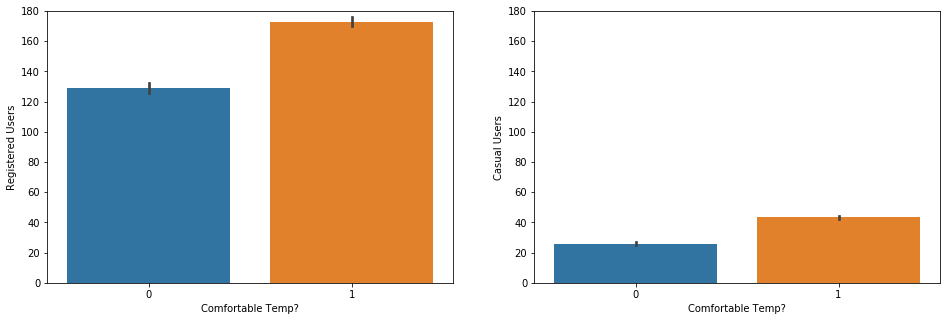

In [6]:
fig, ax = plt.subplots(1,2)
sns.barplot(data=df, x='Comfortable Temp?', y='Registered Users', ax=ax[0])
sns.barplot(data=df, x='Comfortable Temp?', y='Casual Users', ax=ax[1])
ax[0].set(ylim=(0, 180))
ax[1].set(ylim=(0, 180))
fig.set_figheight(5)
fig.set_figwidth(16)
plt.show()

In [7]:
comfy_registered = df[df['Comfortable Temp?'] == 1]['Registered Users']
noncomfy_registered = df[df['Comfortable Temp?'] == 0]['Registered Users']

In [8]:
scipy.stats.ttest_ind(comfy_registered, noncomfy_registered)

Ttest_indResult(statistic=19.141783708515234, pvalue=7.6926513295976845e-81)

With a p-value significantly lower than 0.05, we can conclude that these means are statistically different and that temperature does affect the level of registered ridership.

In [9]:
comfy_casual = df[df['Comfortable Temp?'] == 1]['Casual Users']
noncomfy_casual = df[df['Comfortable Temp?'] == 0]['Casual Users']

In [10]:
scipy.stats.ttest_ind(comfy_casual, noncomfy_casual)

Ttest_indResult(statistic=23.30627567580721, pvalue=2.4872749610746814e-118)

With a p-value significantly lower than 0.05, we can conclude that these means are statistically different and that temperature does affect the level of casual ridership.

### Does Weather Type affect ridership of registered users?

How much does a bad weather day affect that day's rides/revenue?

### Are there more riders in 2011 or 2012?

Is our market share growing?

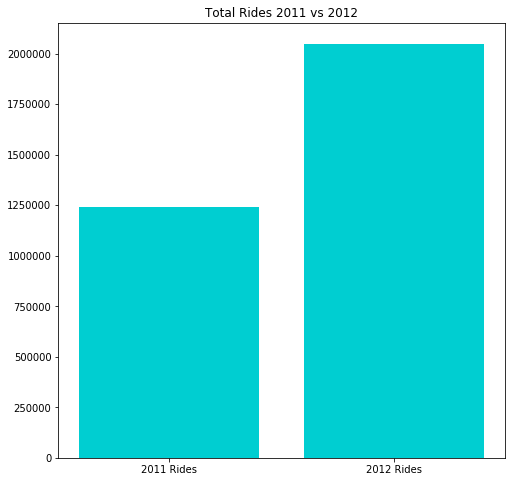

In [29]:
df_2011 = df.loc[df['Date'].dt.year == 2011]
df_2012 = df.loc[df['Date'].dt.year == 2012]
total_2011 = df_2011['Total Users'].sum()
total_2012 = df_2012['Total Users'].sum()

plt.figure(figsize=(8,8))
plt.bar(x = ['2011 Rides', '2012 Rides'], height = [total_2011, total_2012], color = 'darkturquoise')
plt.title('Total Rides 2011 vs 2012')
plt.show()

### Percentage of rides that are rush hour commutes? 

Idea is to say, here is when you should ride for less congestion.

Looking at commutes 7-8am and 5-6pm.

In [11]:
df_7a = df[df.Hour == 7]
df_8a = df[df.Hour == 8]
df_5p = df[df.Hour == 17]
df_6p = df[df.Hour == 18]

In [12]:
df_commute = pd.concat([df_7a, df_8a, df_5p, df_6p])

In [13]:
commute_riders = df_commute['Total Users'].sum()

In [14]:
non_commute_riders = df['Total Users'].sum() - commute_riders

In [15]:
x = ['Commuter Rides', 'Non-Commuter Rides']
y = [commute_riders, non_commute_riders]

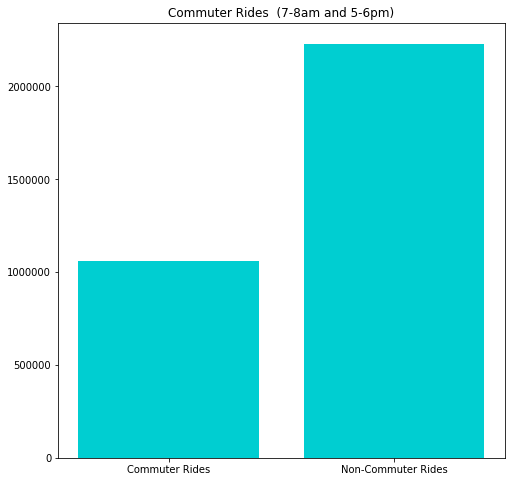

In [16]:
plt.figure(figsize=(8,8))
plt.bar(x, y, color ='darkturquoise')
plt.title('Commuter Rides  (7-8am and 5-6pm)')
plt.show()

If we open up the commuter hours by an hour on each side, 7-9am and 5-7pm.

In [17]:
df_7a = df[df.Hour == 7]
df_8a = df[df.Hour == 8]
df_9a = df[df.Hour == 9]
df_5p = df[df.Hour == 17]
df_6p = df[df.Hour == 18]
df_7p = df[df.Hour == 19]

In [18]:
df_commute = pd.concat([df_7a, df_8a, df_9a, df_5p, df_6p, df_7p])

In [19]:
commute_riders = df_commute['Total Users'].sum()

In [20]:
non_commute_riders = df['Total Users'].sum() - commute_riders

In [21]:
x = ['Commuter Rides', 'Non-Commuter Rides']
y = [commute_riders, non_commute_riders]

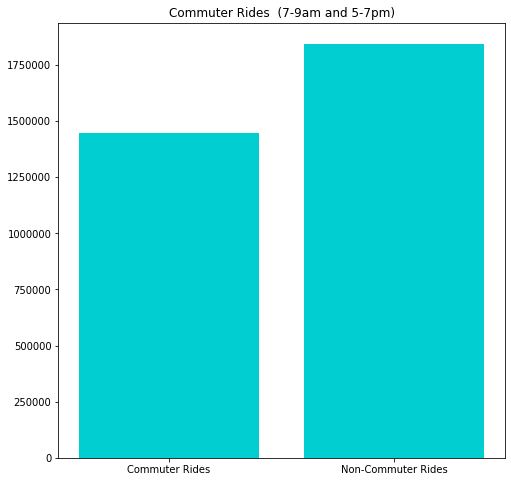

In [22]:
plt.figure(figsize=(8,8))
plt.bar(x, y, color ='darkturquoise')
plt.title('Commuter Rides  (7-9am and 5-7pm)')
plt.show()

In [23]:
commute_riders/(commute_riders + non_commute_riders)*100

43.97729022476834

Increasing the window of commuter times to 7-9am and 5-7pm shows that about 45% of total rides are commuters.

### Do more riders ride in the morning or evening? 

Do people bike into work but not out, or vice versa, what are the pain points driving this behavior?

In [35]:
morning_rides = pd.concat([df_7a, df_8a, df_9a])['Registered Users'].sum()
evening_rides = pd.concat([df_5p, df_6p, df_7p])['Registered Users'].sum()

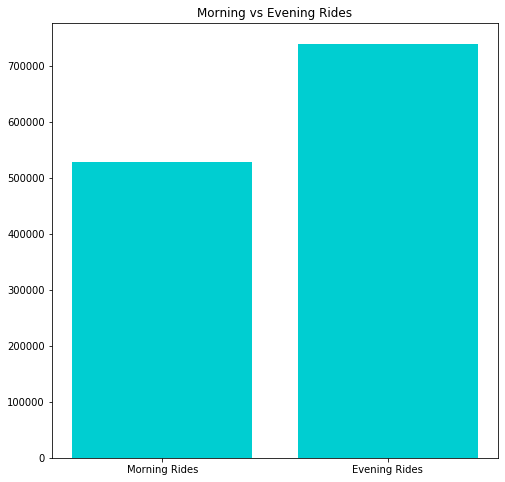

In [37]:
plt.figure(figsize=(8,8))
plt.bar(x = ['Morning Rides', 'Evening Rides'], height = [morning_rides, evening_rides], color = 'darkturquoise')
plt.title('Morning vs Evening Rides')
plt.show()

### Look into what is counted as a holiday here...

In [24]:
df[df.Holiday == 1]['Date'].value_counts()

2012-04-16    24
2012-07-04    24
2011-10-10    24
2012-05-28    24
2011-11-24    24
2011-04-15    24
2011-05-30    24
2012-01-16    24
2012-09-03    24
2012-11-12    24
2011-01-17    24
2011-09-05    24
2011-11-11    24
2011-07-04    24
2012-10-08    24
2012-11-22    24
2011-02-21    24
2011-12-26    23
2012-01-02    23
2012-12-25    23
2012-02-20    23
Name: Date, dtype: int64

- Martin Luther King, Jr. Day
- President's Day
- Easter
- Memorial Day
- Independence Day
- Labor Day
- Columbus Day
- Veterans' Day
- Thanksgiving
- Christmas
- New Years